## Análise de Regressão Simples

### Problema 2

O site Gapminder compilou uma base com dados sobre população, expectativa de vida e PIB per capta de 142 países, em 12 anos diferentes.
Com estes dados, disponibilizados no arquivo pib_gapminder.csv, faça:

a)    Faça a importação dos dados, verifique a estrutura e faça um sumário estatístico.

In [1]:
# Importando dados
pib = read.csv('pib_gapminder.csv')
head(pib)

,pais,ano,pop,continente,expVida,pibPercap
,<fct>,<int>,<dbl>,<fct>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453
2,Afghanistan,1957,9240934,Asia,30.332,820.8530
3,Afghanistan,1962,10267083,Asia,31.997,853.1007
4,Afghanistan,1967,11537966,Asia,34.020,836.1971
5,Afghanistan,1972,13079460,Asia,36.088,739.9811
6,Afghanistan,1977,14880372,Asia,38.438,786.1134


b)    Verifique a estrutura dos dados (str)

In [2]:
# Verificando a estrutura dos dados
str(pib)

'data.frame':	1704 obs. of  6 variables:
 $ pais      : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...


c)    Classifique cada variável de acordo com seu tipo (qualitativa ordinal, nominal, quantitativa discreta, contínua, etc).

* pais      : Qualitativa nominal
* ano       : Quantitativa discreta
* pop       : Quantitativa ordinal
* continente: Qualitativa ordinal
* expVida   : Quantitativa contínua
* pibPercap : Quantitativa contínua

d)    Faça um sumário estatístico dos dados

In [3]:
# Fazendo um sumário estatístico dos dados
summary(pib)

          pais           ano            pop               continente 
 Afghanistan:  12   Min.   :1952   Min.   :6.001e+04   Africa  :624  
 Albania    :  12   1st Qu.:1966   1st Qu.:2.794e+06   Americas:300  
 Algeria    :  12   Median :1980   Median :7.024e+06   Asia    :396  
 Angola     :  12   Mean   :1980   Mean   :2.960e+07   Europe  :360  
 Argentina  :  12   3rd Qu.:1993   3rd Qu.:1.959e+07   Oceania : 24  
 Australia  :  12   Max.   :2007   Max.   :1.319e+09                 
 (Other)    :1632                                                    
    expVida        pibPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  
                                   

e)    Faça uma tabela de frequência absoluta e uma tabela de frequência relativa para verificar o número de observações por continente.

In [4]:
# Carregando bibliotecas
library('dplyr')
library('ggplot2')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
# Montando tabela de frequencia absoluta
fabs=table(pib$continente)
fabs


  Africa Americas     Asia   Europe  Oceania 
     624      300      396      360       24 

In [6]:
# Montando tabela de frequencia relativa
frel=fabs/length(pib$continente)
frel


    Africa   Americas       Asia     Europe    Oceania 
0.36619718 0.17605634 0.23239437 0.21126761 0.01408451 

f)     Faça um gráfico de barras da tabela de frequência absoluta dos continentes.

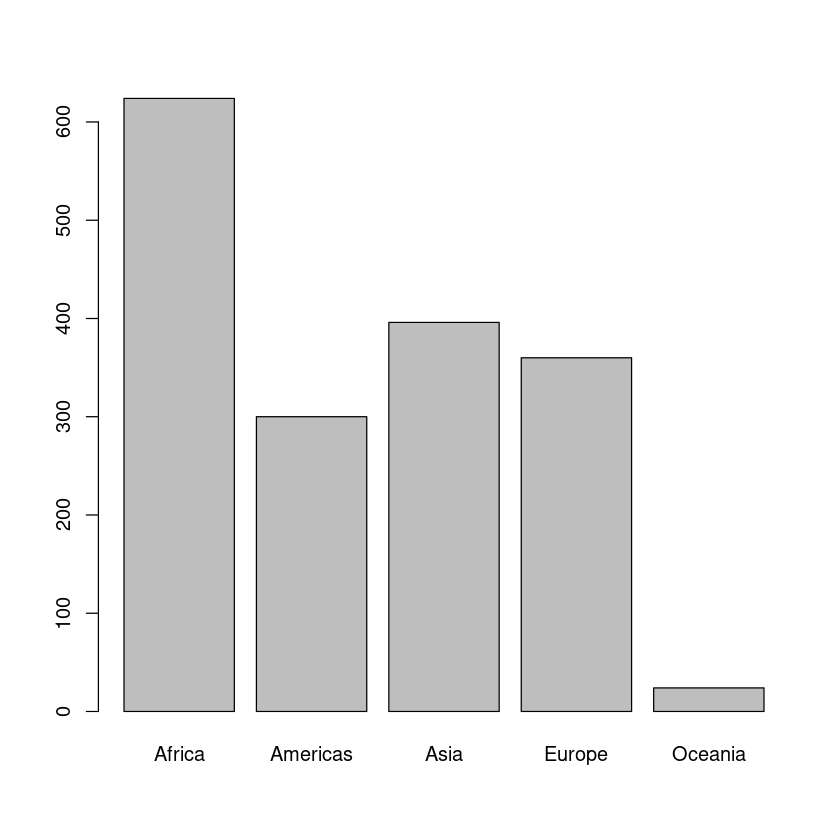

In [7]:
# Montando gráfico de barras da frequencia absoluta dos continentes
barplot(fabs)

g)    Faça um gráfico apropriado para relacionar o PIB per capta à expectativa de vida.

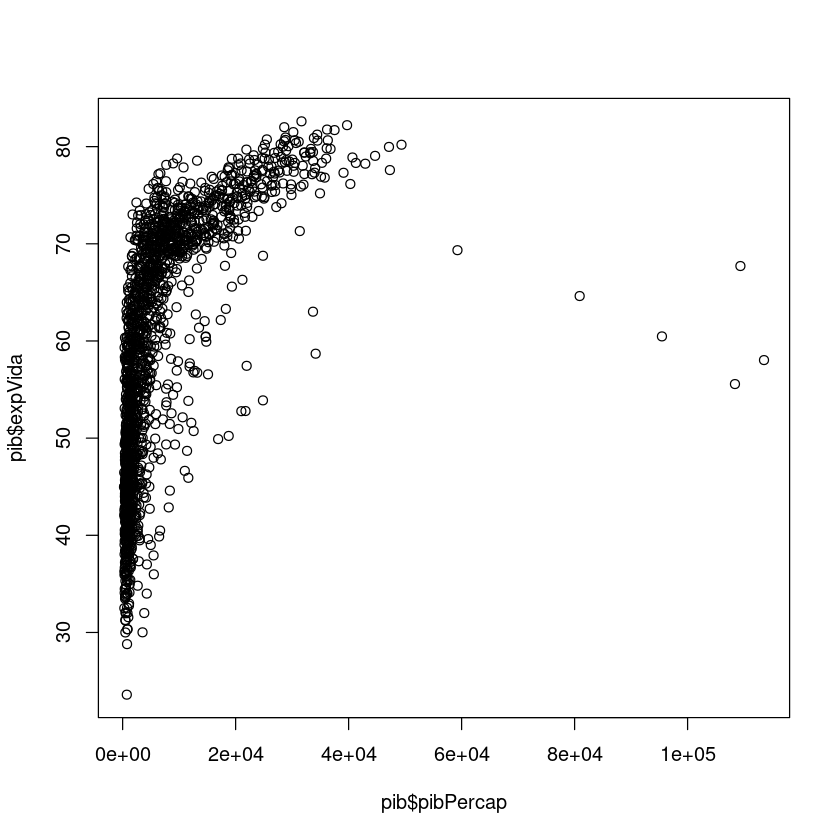

In [8]:
# Criando gráfico relacionando PIB per captta com a expectativa de vida
plot(pib$pibPercap, pib$expVida)

`geom_smooth()` using formula 'y ~ x'



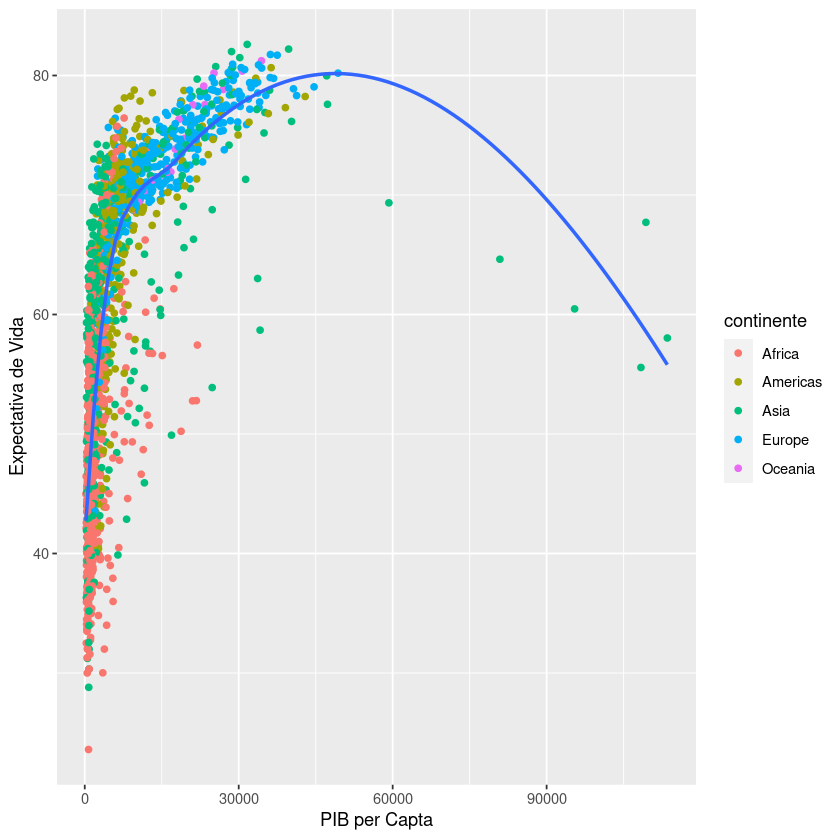

In [9]:
# Criando gráfico relacionando PIB per captta com a expectativa de vida no ggplot
graf1 <- ggplot(data = pib, aes(x = pibPercap, y = expVida)) + geom_point(aes(col=continente)) +
 xlab("PIB per Capta") + ylab("Expectativa de Vida") + geom_smooth(method="loess",se = F)
graf1

h)    Crie duas novas colunas nesta base de dados com o logaritmo de PIB per capta, e o logaritmo da expectativa de vida. Estas colunas devem ter os nomes: lpibPercap e lexpVida, respectivamente.

In [10]:
# Criando duas novas colunas no dataset
pib$lpibPercap = log(pib$pibPercap)
pib$lexpVida = log(pib$expVida)

head(pib)

,pais,ano,pop,continente,expVida,pibPercap,lpibPercap,lexpVida
,<fct>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453,6.658583,3.360410
2,Afghanistan,1957,9240934,Asia,30.332,820.8530,6.710344,3.412203
3,Afghanistan,1962,10267083,Asia,31.997,853.1007,6.748878,3.465642
4,Afghanistan,1967,11537966,Asia,34.020,836.1971,6.728864,3.526949
5,Afghanistan,1972,13079460,Asia,36.088,739.9811,6.606625,3.585960
6,Afghanistan,1977,14880372,Asia,38.438,786.1134,6.667101,3.649047


i)      Faça um gráfico apropriado para relacionar estas duas novas variáveis.

`geom_smooth()` using formula 'y ~ x'



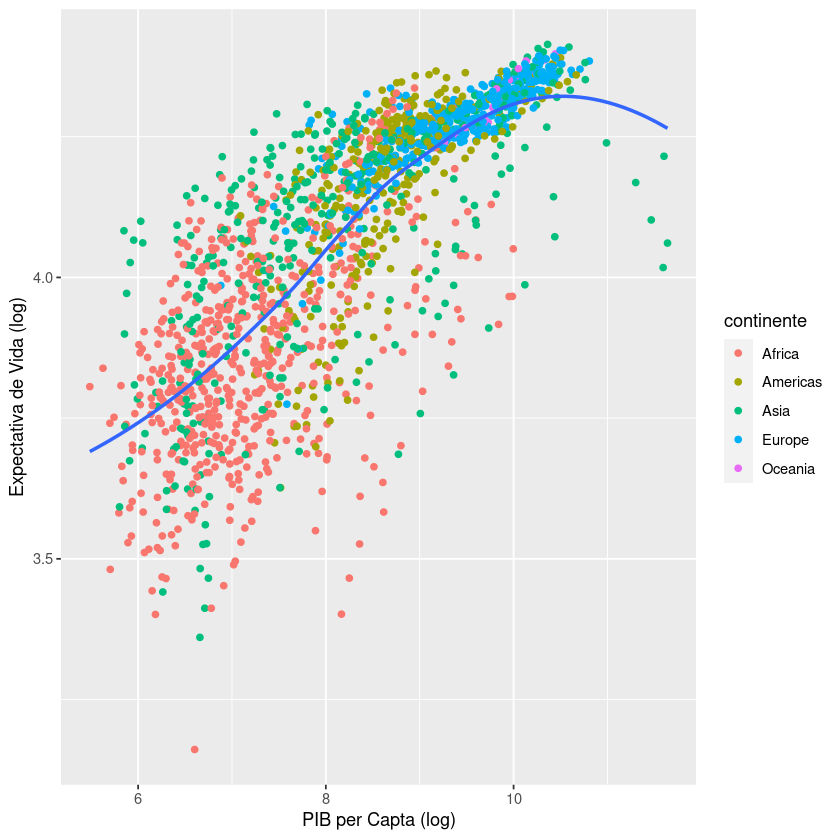

In [11]:
graf1 <- ggplot(data = pib, aes(x = lpibPercap, y = lexpVida)) + geom_point(aes(col=continente)) +
 xlab("PIB per Capta (log)") + ylab("Expectativa de Vida (log)") + geom_smooth(method="loess",se = F)
graf1

j)      Ajuste um modelo linear aos dados, utilizando as duas novas variáveis criadas, sendo lexpVida a variável resposta.

In [12]:
# Criando modelo linear
reg = lm(lexpVida ~ lpibPercap, data=pib)

k)    Faça todas as análises da regressão, julgando:
* i)        Os gráficos diagnósticos

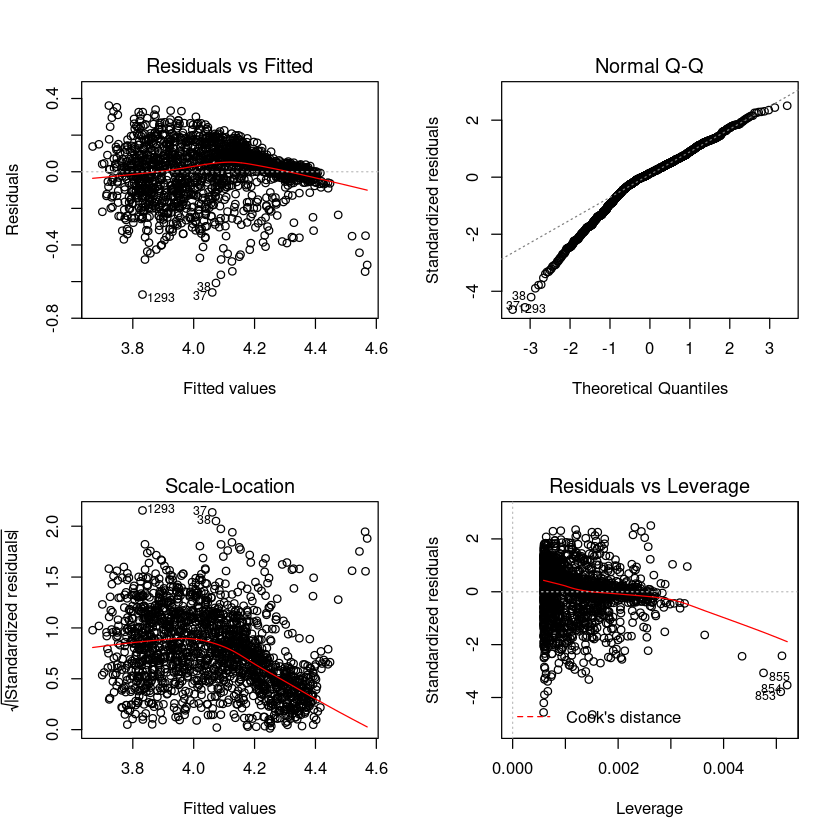

In [13]:
par(mfrow=c(2,2))
plot(reg)

No gráfico de resíduos temos uma distribuição aparentemente aletória para valores menores do que 4, mas que começam a se concentrar acima desse valor. O padrão se assemelha a uma reta.

No gráfico normal QQ temos um comportamento linear entre -1 e 3, com um desvio da normalidade para valores inferiores a -1.

* ii)        Os parâmetros obtidos (avaliar o summary do modelo)

In [14]:
summary(reg)


Call:
lm(formula = lexpVida ~ lpibPercap, data = pib)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67059 -0.06453  0.01978  0.09086  0.36156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.864177   0.023283  123.02   <2e-16 ***
lpibPercap  0.146549   0.002821   51.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1445 on 1702 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.613 
F-statistic:  2698 on 1 and 1702 DF,  p-value: < 2.2e-16


* Resíduos: Estão com uma distribuição mais ou menos simétrica (lado mínimo um pouco maior que o lado positivo), com a mediana próxima de zero
* Significância estatística dos coeficientes: Próxima de 0
* Percentual de variância explicada pelo modelo: 0,613

* iii)        O poder de explicação do modelo.

O modelo está com resíduos baixos, porém o percentual de variância não está com um valor muito bom. A expectativa de vida não é um parâmentro complexo e não está relacionada somente ao PIB per capta, conseguiríamos melhorar esse índice com a adição de mais variáveis no nosso modelo.